## Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

## Define the state-space matrices

In [2]:
A = np.array([
    [0,    0,     0,     0,     0,     1,     0,     0,     0,     0],
    [0,    0,     0,     0,     0,     1,    -1,     0,     0,     0],
    [0,    0,     0,     0,     0,     0,     1,    -1,     0,     0],
    [0,    0,     0,     0,     0,     0,     0,     1,    -1,     0],
    [0,    0,     0,     0,     0,     0,     0,     0,     1,    -1],
    [0, -12.5,   0,     0,     0,    -0.75,  0.75,   0,     0,     0],
    [0,  62.5, -62.5,   0,     0,     3.75, -7.5,    3.75,  0,     0],
    [0,   0,    62.5, -62.5,   0,     0,     3.75,  -7.5,   3.75,  0],
    [0,   0,     0,    62.5, -62.5,   0,     0,      3.75, -7.5,   3.75],
    [0,    0,    0,     0,    62.5,  0,     0,      0,     3.75, -3.75]
])
b1 = np.array([0,    0,    0,    0,    0, 0.005,   0,    0,    0,    0]).reshape(-1, 1)
b2 = np.array([0,    0,    0,    0,    0, 250,    0,    0,    0, -1250]).reshape(-1, 1)
C = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]).reshape(1, -1)
D = np.array([0])
u = 750  # Constant input
b = u*b1 + b2

## Create the state-space model using signal.StateSpace

In [3]:
train_model = signal.StateSpace(A, b2, C, D)

## Time vector for simulation

In [4]:
t = np.arange(0, 7, 0.001)

## Initial conditions for simulation

In [5]:
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Simulate the forced response using lsim function

In [6]:
t_initial, y_initial, x_initial = signal.lsim(train_model, U=np.ones_like(t), T=t, X0=x0)

## Plot initial response

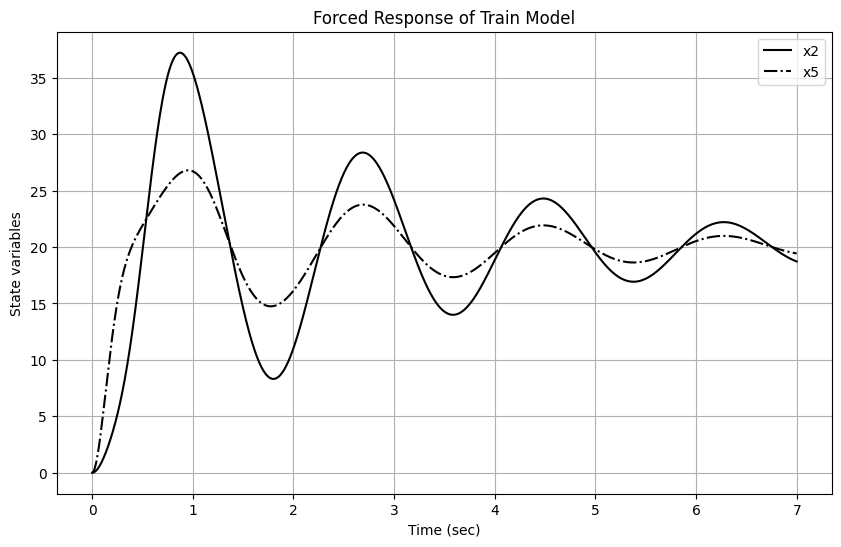

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(t_initial, x_initial[:, 1], 'k', label='x2')
plt.plot(t_initial, x_initial[:, 4], '-.k', label='x5')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.title('Forced Response of Train Model')
plt.show()

## Generate input signal u(t)

In [8]:
u = 0.1 * (np.sin(5 * t) + np.sin(9 * t) + np.sin(13 * t) + np.sin(17 * t) + np.sin(21 * t))

## Simulate the system response to input signal using lsim function

In [9]:
t_response, y_response, x_response = signal.lsim(train_model, U=u, T=t, X0=x0)

## Plot the response to input signal

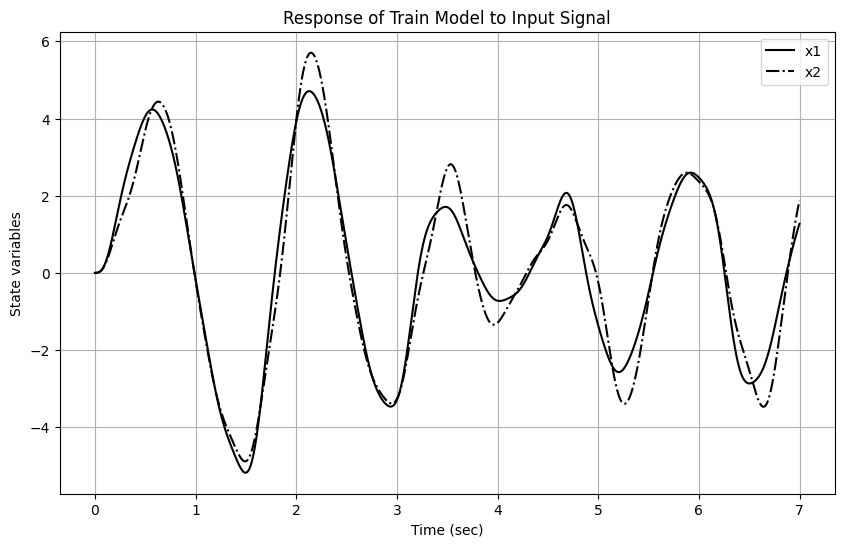

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(t_response, x_response[:, 0], 'k', label='x1')
plt.plot(t_response, x_response[:, 1], '-.k', label='x2')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.title('Response of Train Model to Input Signal')
plt.show()